# scatterplots, density plots and hexagonal binning


base code from: 

https://python-graph-gallery.com/86-avoid-overlapping-in-scatterplot-with-2d-density
 

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

In [2]:
# generate data points
n_points=500
random_state = 100
random_points_generator=np.random.RandomState(100) #set random seed to ensure reproducibility
data = random_points_generator.multivariate_normal([0, 0], [[1, 0.6], [0.5, 3]], n_points)
x, y = data.T

<ipython-input-2-f022cb3185c6>:5: RuntimeWarning: covariance is not positive-semidefinite.
  data = random_points_generator.multivariate_normal([0, 0], [[1, 0.6], [0.5, 3]], n_points)


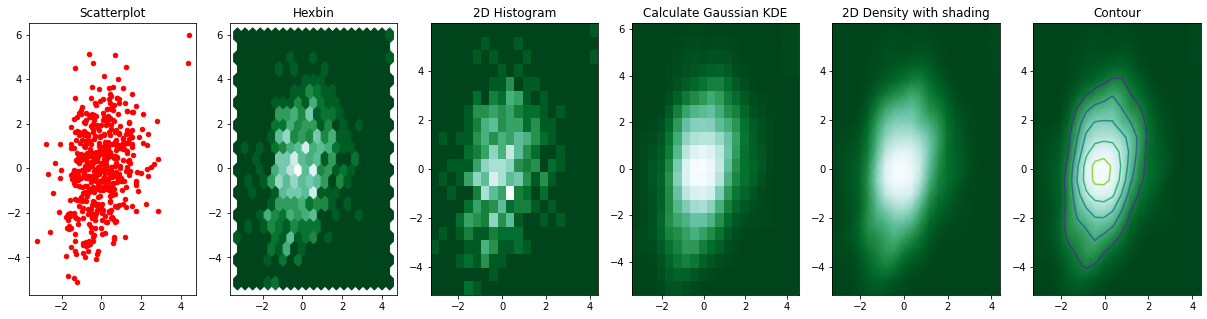

In [3]:
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))

#choose a color map
colors=plt.cm.BuGn_r
 
# Scatterplot
axes[0].set_title('Scatterplot')
axes[0].scatter(x, y, s=20, color="red")
 
# interpolation with hexagonal bins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=colors)

 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=colors)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=colors)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=colors)

# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )

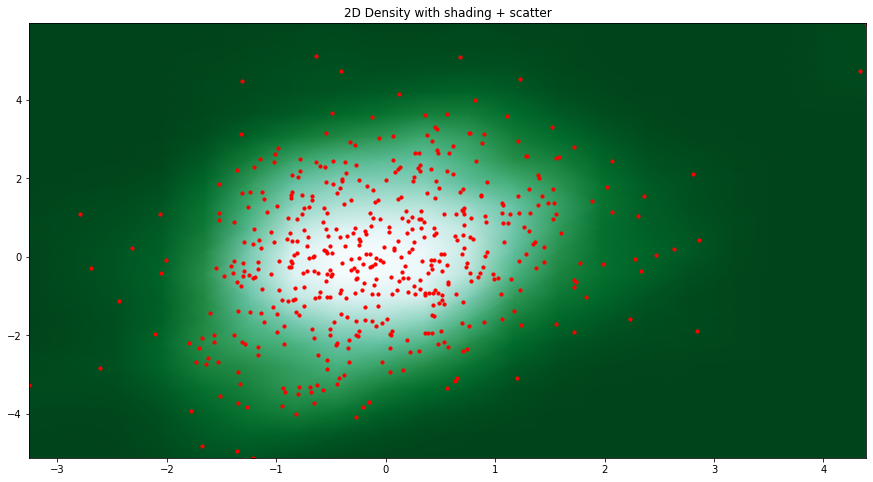

In [4]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15, 8))

axes.set_title('2D Density with shading + scatter')
axes.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes.scatter(x, y, s=10, color="red")